### 1. Import core library

In [1]:
## Import sklearn modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### 2. Load iris dataset

In [3]:
iris = load_iris() # return object iris
X =iris.data # feature matrix, it is a Numpy array
y = iris.target # labels

In [4]:
# convert to Dataframe for readability
# DataFrame is 2D labeled table
df = pd.DataFrame(X, columns = iris.feature_names)
df['species'] = y
df.head


<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

### 3. Feature scaling

In [5]:
# StandardScaler() performs feature standardization, convert into mean=0, standard deviation=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Apply K-Means clustering

In [7]:
kmeans = KMeans(n_clusters = 3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
# cluster labels
cluster_labels = kmeans.labels_

In [8]:
# view the cluster labels
kmeans.labels_

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### 5. Add Cluster Labels to DataFrame

In [9]:
df['cluster'] = cluster_labels

In [10]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

### 6. Calculate WCSS and Silhouette Score

In [11]:
sil_score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette score:", sil_score)
wcss = kmeans.inertia_
print("WCSS:", wcss)

Silhouette score: 0.4798814508199817
WCSS: 191.02473685317972


### 7. Visualize Clustering (2D projection)

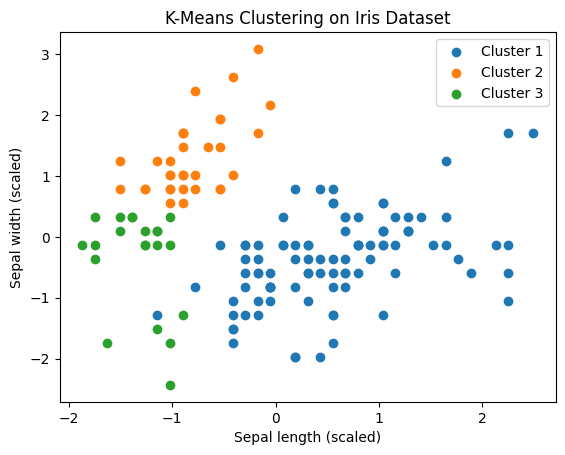

In [12]:
# Plot each cluster separately
for cluster_id in np.unique(cluster_labels):
    plt.scatter(
        X_scaled[cluster_labels == cluster_id, 0], # , 0 -> first feature-> sepal length
        X_scaled[cluster_labels == cluster_id, 1], # , 1-> second feature -> sepal width
        label=f"Cluster {cluster_id + 1}"
    )

plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.title("K-Means Clustering on Iris Dataset")

plt.legend()
plt.show()

### 8. Elbow Method

In [14]:
inertia_values = []

In [15]:
# loop through from K=1 to K=10 to calculate WCSS for each K
for k in range(1,10):
    km = KMeans(n_clusters = k,random_state=42,n_init=10)
    km.fit(X_scaled)
    inertia_values.append(km.inertia_) # 

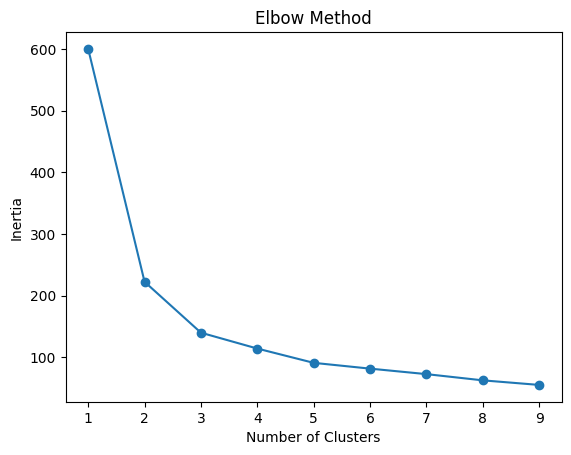

In [16]:

plt.figure()
plt.plot(range(1,10), inertia_values,marker='o')# add circular markers

plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

### 9. Visualize the cluster centers in a heat map

In [17]:
# We choose K=3
# view the cluster centers
kmeans3 = KMeans(n_clusters = 3, random_state=42, n_init='auto')
kmeans3.fit(X_scaled)
kmeans3.cluster_centers_

array([[ 0.57100359, -0.37176778,  0.69111943,  0.66315198],
       [-0.81623084,  1.31895771, -1.28683379, -1.2197118 ],
       [-1.32765367, -0.373138  , -1.13723572, -1.11486192]])

In [18]:
# extract only the features
data = df.drop(columns=['species','cluster'])

In [19]:
# view the column names
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='str')

In [20]:
# view the cluster centers in a dataframe
cluster_centers3 = pd.DataFrame(
    kmeans3.cluster_centers_,
    columns=data.columns
)

cluster_centers3

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.571004,-0.371768,0.691119,0.663152
1,-0.816231,1.318958,-1.286834,-1.219712
2,-1.327654,-0.373138,-1.137236,-1.114862


<Axes: >

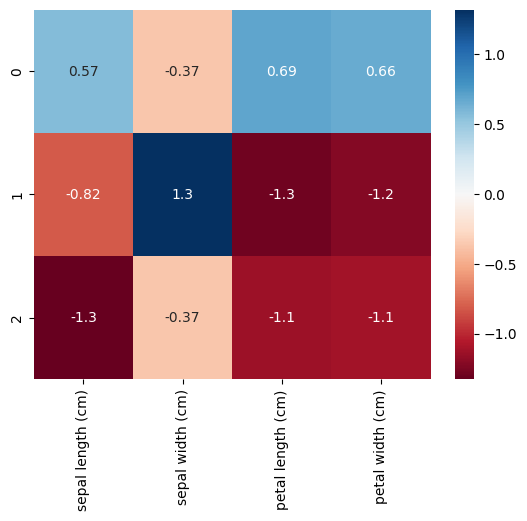

In [21]:
# Visualize the cluster centers in a heatmap 
import seaborn as sns
sns.heatmap(cluster_centers3,cmap='RdBu', annot=True)

clustering 
- Cluster 0 → Iris Virginica (largest petals)
- Cluster 1 → Iris Setosa (very small petals, very high sepal width)
- Cluster 2 → Iris Versicolor (smaller but not extreme)


End of script.